In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [15]:
consumer_staple = pd.read_csv('./plotdf_consumer_staple.csv')
consumer_discrete = pd.read_csv('./plotdf_consumer_discrete.csv')
industrial = pd.read_csv('./plotdf_industrials.csv')

In [4]:
print consumer_staple.shape
print consumer_dicrete.shape
print industrial.shape

(17, 3)
(17, 3)
(17, 3)


## Feature importance together

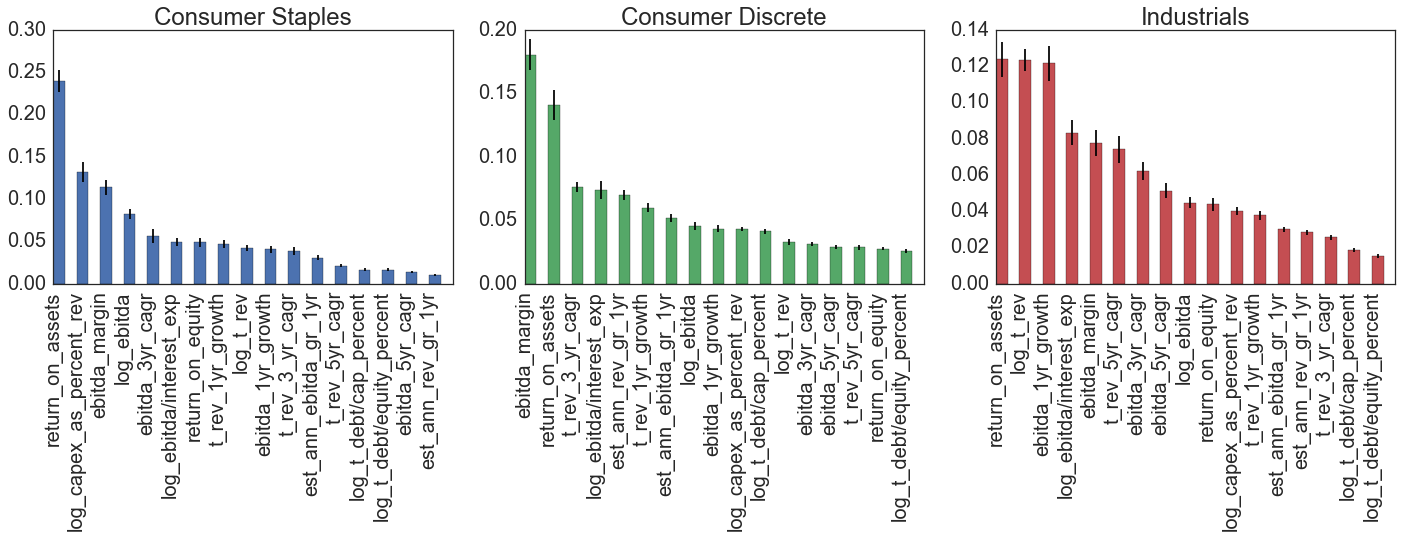

In [74]:
sns.set(font_scale=2)
sns.set_style("white")
current_palette = sns.color_palette()

width = 0.5

fig, ax = plt.subplots(1,3)
fig.set_size_inches(20, 8)

ind = np.arange(len(consumer_staple))  # the x locations for the groups
se = consumer_staple["se"] * 2
ax[0].bar(ind, consumer_staple.mean_importance, width, color=current_palette[0], yerr=tuple(se), ecolor='k')
ax[0].set_xlim(0, 17)
ax[0].set_xticks(ind)
ax[0].set_xticklabels(consumer_staple["feature"], rotation=90)
ax[0].set_title('Consumer Staples')


ind = np.arange(len(consumer_discrete))  # the x locations for the groups
se = consumer_discrete["se"] * 2
ax[1].bar(ind, consumer_discrete.mean_importance, width, color=current_palette[1], yerr=tuple(se), ecolor='k')
ax[1].set_xlim(0, 17)
ax[1].set_xticks(ind)
ax[1].set_xticklabels(consumer_discrete["feature"], rotation=90)
ax[1].set_title('Consumer Discrete')

ind = np.arange(len(industrial))  # the x locations for the groups
se = industrial["se"] * 2
ax[2].bar(ind, industrial.mean_importance, width, color=current_palette[2], yerr=tuple(se), ecolor='k')
ax[2].set_xlim(0, 17)
ax[2].set_xticks(ind)
ax[2].set_xticklabels(industrial["feature"], rotation=90)
ax[2].set_title('Industrials')

#plt.title('Feature Importance (100 trials)')
plt.savefig('feature importance together.png')

## Most important features

In [66]:
NUM = 3

import_features = np.r_[consumer_staple.feature.values[:NUM],
                        consumer_discrete.feature.values[:NUM],
                        industrial.feature.values[:NUM]]
import_mean_values = np.r_[consumer_staple.mean_importance.values[:NUM],
                           consumer_discrete.mean_importance.values[:NUM],
                           industrial.mean_importance.values[:NUM]]
se = np.r_[consumer_staple.se[:NUM] * 2, consumer_discrete.se[:NUM] * 2, industrial.se[:NUM]*2]

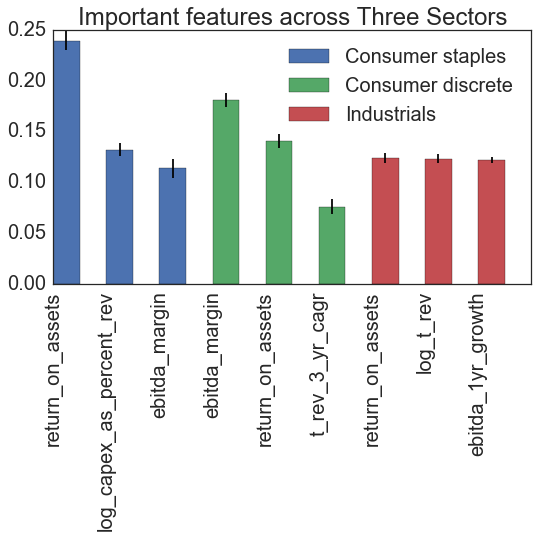

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

width = 0.5
f = []
for i in range(3):
    ind = np.arange(i*3, (i+1)*3)

    f.append(ax.bar(ind, import_mean_values[i*3:(i+1)*3], width, 
                    color=current_palette[i], yerr=tuple(se[i*3:(i+1)*3]), ecolor='k'))

ax.set_xlim(0, 9)
ax.set_xticks(np.arange(9))
ax.set_xticklabels(import_features, rotation=90)
ax.set_title('Important features across Three Sectors')
ax.set_yticks(np.arange(0, 0.30, 0.05))
plt.legend((f[0], f[1], f[2]), ('Consumer staples', 'Consumer discrete', 'Industrials'))
plt.savefig("Import features across different sectors.png")

In [53]:
import_mean_values[i*3:(i+1)*3]

array([ 0.23957674])

In [60]:
len(import_mean_values)

12